# <center> Prediccion de Precios en Bienes Raices - Mercado Australiano - Regresion Avanzada

# Tabla de Contenido

1. [Introduccion](#Introduccion)
2. [Configuracion e Instalacion](#Configuracion-e-Instalacion)
3. [Entendimiento de los Datos](#Entendimiento-de-los-Datos)  
4. [Manipulacion y Limpieza de Datos](#Manipulacion-y-Limpieza-de-Datos)
    1. [Dropping Data](#Dropping-Data)
    2. [Derived Data](#Derived-Data)
5. [Analisis de Datos](#Analisis-de-Datos)
    1. [Analisis-Univariable](#Analisis-Univariable)
        1. [Plot Numeric Data](#Plot-Numeric-Data)
        2. [Plot Categorical Data](#Plot-Categorical-Data)
    2. [Analisis-Bivariable](#Analisis-Bivariable)
6. [Preparacion de Datos y Modelado](#Preparacion-de-Datos-y-Modelado)
    1. [Splitting data into Train Test](#Splitting-data-into-Train-Test)
7. [Construccion-del-Modelo](#Model-Building)
    1. [Ridge Regression](#Ridge-Regression)
    2. [Lasso Regression](#Lasso-Regression)
    3. [ElasticNet Regression](#ElasticNet-Regression)
8. [Conclusions y Observaciones](#Conclusiones-y-Observaciones)

# **Introduccion**

### Integrates de Grupo:
* Lizeth Coaquira (lizcoaquira@gmail.com)
* Litzi Adriana Cruz (litziadrianacruz@gmail.com)
* Viviana Luque (v_luque_s@hotmail.com)
* Juan Pablo Obleas (jpoc_12@hotmail.com)

## Entendimiento del Negocio

Una empresa de vivienda con sede en EE. UU. llamada Surprise Housing ha decidido ingresar al mercado australiano. La empresa utiliza el análisis de datos para comprar casas a un precio inferior a sus valores reales y venderlas a un precio más alto. Con el mismo propósito, la empresa ha recopilado un conjunto de datos de la venta de casas en Australia. Los datos se proporcionan en el archivo CSV a continuación.

La compañía está buscando posibles propiedades para comprar e ingresar al mercado. Debe construir un modelo de regresión utilizando la regularización para predecir el valor real de las posibles propiedades y decidir si invertir en ellas o no.

La empresa quiere saber:

* Qué variables son significativas para predecir el precio de una casa, y
* Qué tan bien esas variables describen el precio de una casa.

Además, determine el valor óptimo de lambda para la regresión de Ridge y Lasso.

### Objetivo del Negocio:

Debe modelar el precio de las casas con las variables independientes disponibles. Luego, la gerencia utilizará este modelo para comprender cómo varían exactamente los precios con las variables. En consecuencia, pueden manipular la estrategia de la empresa y concentrarse en áreas que generarán altos rendimientos. Además, el modelo será una buena manera para que la gerencia entienda la dinámica de precios de un nuevo mercado.

# **Configuracion e Instalacion**

In [ ]:
# Importar Librerias Requeridas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
import seaborn as sns
import sys

# Importar Librerias de Machine Learning
import sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Importar Librerias de Estadistica
!pip install statsmodels
import statsmodels.api as stats
from statsmodels.api import OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson

# Ignorar Alertas (Warnings)
import warnings
warnings.filterwarnings('ignore')

# Definir precision del FLOAT a dos digitos.
pd.options.display.float_format = '{:.2f}'.format

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 16.9 MB/s eta 0:00:00


# **Entendimiento de los Datos**

In [ ]:
# Leer el DATASET CSV con en un Dataframe.

# Direccion relativa del Dataset
DATA_FILE_PATH = '/content/dataset.csv'

raw_data = pd.read_csv(DATA_FILE_PATH)

In [ ]:
raw_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.00,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,...,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,730.50,56.90,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,...,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.20
std,421.61,42.30,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,...,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.50
min,1.00,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.00
25%,365.75,20.00,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.00
50%,730.50,50.00,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,...,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.00
75%,1095.25,70.00,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,...,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.00
max,1460.00,190.00,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,...,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Tamaño del Dataset

In [ ]:
raw_data.shape

(1460, 81)

In [ ]:
raw_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalArea,Age
0,1,60,6,65,2,3,1,1,1,1,...,1,6,0,2,2008,1,1,208500,10160,21
1,2,20,6,80,2,3,1,1,1,4,...,1,6,0,5,2007,1,1,181500,10862,48
2,3,60,6,68,2,3,2,1,1,1,...,1,6,0,9,2008,1,1,223500,13036,23
3,4,70,6,60,2,3,2,1,1,2,...,1,6,0,2,2006,1,2,140000,11267,109
4,5,60,6,84,2,3,2,1,1,4,...,1,6,0,12,2008,1,1,250000,16458,24


## Numero de columnas por tipo de dato

In [ ]:
column_counts = raw_data.dtypes.value_counts()

for data_type, count in column_counts.items():
    print(f'Número de columnas de tipo {data_type}: {count}')

Número de columnas de tipo object: 43
Número de columnas de tipo int64: 35
Número de columnas de tipo float64: 3


# **Manipulación y limpieza de datos**

## Tratamiento de valores Nulos- Imputacion de datos

- Para columnas numéricas como 'LotFrontage', 'MasVnrArea', y 'GarageYrBlt', se utilizara la mediana porque es una medida robusta frente a outliers.

- Para las columnas categóricas, se utilizaron dos enfoques distintos de imputación, según el significado de los valores faltantes:


   - En columnas como 'FireplaceQu', 'GarageType' y 'BsmtQual', etc., los valores nulos (NaN) indican que la propiedad no tiene esa característica (por ejemplo, no tiene chimenea o garaje). Estos valores se reemplazaron con etiquetas específicas como "No Fireplace" o "No Garage" para reflejar la ausencia de la característica.

   - En la columna 'Electrical', los valores nulos representan datos perdidos en la recopilación. Aquí se utilizó el valor más frecuente (moda) para completar los valores faltantes, ya que refleja la opción más común en la población.

In [ ]:
# Creamos una limpieza preventiva del dataset para valores de tipo object que muestran 'NaN' o 'NA' para que no se encuentren diferencias en variables categóricas
raw_data['PoolQC'] = raw_data['PoolQC'].fillna('No Pool')
raw_data['MiscFeature'] = raw_data['MiscFeature'].fillna('None')
raw_data['Fence'] = raw_data['Fence'].fillna('No Fence')
raw_data['Alley'] = raw_data['Alley'].fillna('No alley access')
raw_data['MasVnrType'] = raw_data['MasVnrType'].fillna('None')
raw_data['FireplaceQu'] = raw_data['FireplaceQu'].fillna('No Fireplace')
raw_data['GarageType'] = raw_data['GarageType'].fillna('No Garage')
raw_data['GarageQual'] = raw_data['GarageQual'].fillna('No Garage')
raw_data['GarageCond'] = raw_data['GarageCond'].fillna('No Garage')
raw_data['BsmtExposure'] = raw_data['BsmtExposure'].fillna('No Basement')
raw_data['BsmtFinType1'] = raw_data['BsmtFinType1'].fillna('No Basement')
raw_data['BsmtFinType2'] = raw_data['BsmtFinType2'].fillna('No Basement')
raw_data['BsmtQual'] = raw_data['BsmtQual'].fillna('No Basement')
raw_data['BsmtCond'] = raw_data['BsmtCond'].fillna('No Basement')

In [ ]:
# Verificamos los datos nulos que existen en el dataset
missing_values_per_column = raw_data.isna().sum()
missing_values_percentages = (missing_values_per_column/len(raw_data))*100

missing_values_percentages = missing_values_percentages[missing_values_percentages > 0].sort_values(ascending=False)
print(missing_values_percentages.to_string())

LotFrontage    17.74
GarageFinish    5.55
GarageYrBlt     5.55
MasVnrArea      0.55
Electrical      0.07


In [ ]:
valores_nulos = raw_data[['LotFrontage', 'GarageYrBlt', 'Electrical']].isna().sum()
print("Cantidad de valores nulos en:", valores_nulos)

Cantidad de valores nulos en: LotFrontage    259
GarageYrBlt     81
Electrical       1
dtype: int64


In [ ]:
# Planteamos cambios en los valores nulos para que se reconozcan como Zero Lot Frontage Properties o '0'
raw_data['LotFrontage'] = raw_data['LotFrontage'].fillna(0)
raw_data['LotFrontage'] = raw_data['LotFrontage'].astype('int64')

In [ ]:
# Llenamos el cambio para los valores faltantes en años, al completarlos con los años de remodelaje
def Yr_Fill(garage_year, remodel_year):
    if pd.isna(garage_year):
        return remodel_year
    else:
        return garage_year

raw_data['GarageYrBlt'] = raw_data.apply(lambda row: Yr_Fill(row['GarageYrBlt'], row['YearRemodAdd']), axis=1)
raw_data['GarageYrBlt'] = raw_data['GarageYrBlt'].astype('int64')

In [ ]:
# Considerando que es un valor único, lo llenamos con el dato más repetido en la columna
raw_data['Electrical'] = raw_data['Electrical'].fillna('SBrkr')

In [ ]:
# Eliminamos las columnas que no tienen relevancia por su relación con la variable objetivo.
raw_data = raw_data.drop(columns=['MasVnrArea', 'GarageFinish'])

## *Transformación de datos*

### Mapeo de las variables en tres categorias:

Las categorias dividen las variables de tipo *object* en tres grupos:

* La primera categoría se encarga de los datos que tienen un orden implícito y se subdividen en 2 grupos: el primero que tiene entre 2 y 4 categorías, el segundo de 5 a más categorias. En ambos casos evitando que se incremente el tamaño del dataset.
* La segunda categoría se encarga de los datos que no tienen un orden implícito y su tratamiento probablemente implique incrementar la dimensionalidad del dataset para beneficiar el modelo.
* La tercera categoría se encarga de los datos más irregulares o que tienen mayores categorias e implicaría más memoria y un riesgo de sobre ajuste de los datos.


In [ ]:
# Primera subdivisión, son variables comúnmente binarias o de pocas categorias
mapping_1st = {
    'Street': {'Grvl': 1, 'Pave': 2},
    'Alley': {'Grvl': 1, 'Pave': 2, 'No alley access': 3},
    'LotShape': {'Reg': 1, 'IR1': 2, 'IR2': 3, 'IR3': 4},
    'LandContour': {'Lvl': 1, 'Bnk': 2, 'HLS': 3, 'Low': 4},
    'Utilities': {'AllPub': 1, 'NoSewr': 2, 'NoSeWa': 3, 'ELO': 4},
    'LandSlope': {'Gtl': 1, 'Mod': 2, 'Sev': 3},
    'CentralAir': {'N': 1, 'Y': 2},
    'PavedDrive': {'Y': 3, 'P': 2, 'N': 1},
}

for col, mapping in mapping_1st.items():
    if col in raw_data.columns:
        raw_data[col] = raw_data[col].map(mapping)

In [ ]:
# Segunda subdivisión, son variables de evaluación del estado de una característica de las propiedades y son de 5 o más categorías:
mapping_2nd = {
    'ExterQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'ExterCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'BsmtQual': {'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'No Basement': 1},
    'BsmtCond': {'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'No Basement': 1},
    'BsmtExposure': {'Gd': 5, 'Av': 4, 'Mn': 3, 'No': 2, 'No Basement': 1},
    'HeatingQC': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'KitchenQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'FireplaceQu': {'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'No Fireplace': 1},
    'GarageQual': {'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'No Garage': 1},
    'GarageCond': {'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'No Garage': 1},
    'PoolQC': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'No Pool': 1},
    'Fence': {'GdPrv': 5, 'MnPrv': 4, 'GdWo': 3, 'MnWw': 2, 'No Fence': 1}
}

for col, mapping in mapping_2nd.items():
    if col in raw_data.columns:
        raw_data[col] = raw_data[col].map(mapping)

In [ ]:
# Tercera subdivisión, son variables principalmente irregulares y describen características o categorias muy numerosas.
mapping_3rd = {
    'MSZoning': {'A': 1, 'C (all)': 2, 'FV': 3, 'I': 4, 'RH': 5, 'RL': 6, 'RP': 7, 'RM': 8},
    'LotConfig': {'Inside': 1, 'Corner': 2, 'CulDSac': 3, 'FR2': 4, 'FR3': 5},
    'Neighborhood': {'Blmngtn': 1, 'Blueste': 2, 'BrDale': 3, 'BrkSide': 4, 'ClearCr': 5, 'CollgCr': 6, 'Crawfor': 7, 'Edwards': 8, 'Gilbert': 9, 'IDOTRR': 10, 'MeadowV': 11, 'Mitchel': 12, 'NAmes': 13, 'NoRidge': 14, 'NPkVill': 15, 'NridgHt': 16, 'NWAmes': 17, 'OldTown': 18, 'SWISU': 19, 'Sawyer': 20, 'SawyerW': 21, 'Somerst': 22, 'StoneBr': 23, 'Timber': 24, 'Veenker': 25},
    'Condition1': {'Artery': 1, 'Feedr': 2, 'Norm': 3, 'RRNn': 4, 'RRAn': 5, 'PosN': 6, 'PosA': 7, 'RRNe': 8, 'RRAe': 9},
    'Condition2': {'Artery': 1, 'Feedr': 2, 'Norm': 3, 'RRNn': 4, 'RRAn': 5, 'PosN': 6, 'PosA': 7, 'RRNe': 8, 'RRAe': 9},
    'BldgType': {'1Fam': 1, '2fmCon': 2, 'Duplex': 3, 'TwnhsE': 4, 'Twnhs': 5},
    'HouseStyle': {'1Story': 1, '1.5Fin': 2, '1.5Unf': 3, '2Story': 4, '2.5Fin': 5, '2.5Unf': 6, 'SFoyer': 7, 'SLvl': 8},
    'RoofStyle': {'Flat': 1, 'Gable': 2, 'Gambrel': 3, 'Hip': 4, 'Mansard': 5, 'Shed': 6},
    'RoofMatl': {'ClyTile': 1, 'CompShg': 2, 'Membran': 3, 'Metal': 4, 'Roll': 5, 'Tar&Grv': 6, 'WdShake': 7, 'WdShngl': 8},
    'Exterior1st': {'AsbShng': 1, 'AsphShn': 2, 'BrkComm': 3, 'BrkFace': 4, 'CBlock': 5, 'CemntBd': 6, 'HdBoard': 7, 'ImStucc': 8, 'MetalSd': 9, 'Other': 10, 'Plywood': 11, 'PreCast': 12, 'Stone': 13, 'Stucco': 14, 'VinylSd': 15, 'Wd Sdng': 16, 'WdShing': 17},
    'Exterior2nd': {'AsbShng': 1, 'AsphShn': 2, 'Brk Cmn': 3, 'BrkFace': 4, 'CBlock': 5, 'CmentBd': 6, 'HdBoard': 7, 'ImStucc': 8, 'MetalSd': 9, 'Other': 10, 'Plywood': 11, 'PreCast': 12, 'Stone': 13, 'Stucco': 14, 'VinylSd': 15, 'Wd Sdng': 16, 'Wd Shng': 17},
    'MasVnrType': {'BrkCmn': 1, 'BrkFace': 2, 'CBlock': 3, 'None': 4, 'Stone': 5},
    'Foundation': {'BrkTil': 1, 'CBlock': 2, 'PConc': 3, 'Slab': 4, 'Stone': 5, 'Wood': 6},
    'BsmtFinType1': {'GLQ': 1, 'ALQ': 2, 'BLQ': 3, 'Rec': 4, 'LwQ': 5, 'Unf': 6, 'No Basement': 7},
    'BsmtFinType2': {'GLQ': 1, 'ALQ': 2, 'BLQ': 3, 'Rec': 4, 'LwQ': 5, 'Unf': 6, 'No Basement': 7},
    'Heating': {'Floor': 1, 'GasA': 2, 'GasW': 3, 'Grav': 4, 'OthW': 5, 'Wall': 6},
    'Electrical': {'SBrkr': 1, 'FuseA': 2, 'FuseF': 3, 'FuseP': 4, 'Mix': 5},
    'Functional': {'Typ': 1, 'Min1': 2, 'Min2': 3, 'Mod': 4, 'Maj1': 5, 'Maj2': 6, 'Sev': 7, 'Sal': 8},
    'GarageType': {'2Types': 1, 'Attchd': 2, 'Basment': 3, 'BuiltIn': 4, 'CarPort': 5, 'Detchd': 6, 'No Garage': 7},
    'MiscFeature': {'Elev': 1, 'Gar2': 2, 'Othr': 3, 'Shed': 4, 'TenC': 5, 'None': 6},
    'SaleType': {'WD': 1, 'CWD': 2, 'VWD': 3, 'New': 4, 'COD': 5, 'Con': 6, 'ConLw': 7, 'ConLI': 8, 'ConLD': 9, 'Oth': 10},
    'SaleCondition': {'Normal': 1, 'Abnorml': 2, 'AdjLand': 3, 'Alloca': 4, 'Family': 5, 'Partial': 6},
}

for col, mapping in mapping_3rd.items():
    if col in raw_data.columns:
        raw_data[col] = raw_data[col].map(mapping)

In [ ]:
column_counts = raw_data.dtypes.value_counts()

for data_type, count in column_counts.items():
    print(f'Número de columnas de tipo {data_type}: {count}')

Número de columnas de tipo int64: 79


*Ajustes al dataframe para prevenir el aumento en la multicolinealidad*

In [ ]:
current_year = 2024
raw_data.drop(columns=[
    'MSZoning', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCond', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'PoolQC'
    ])
raw_data['TotalArea'] = raw_data['LotArea'] + raw_data['GrLivArea']
raw_data = raw_data.drop(columns=['LotArea', 'GrLivArea'])
raw_data['Age'] = current_year - raw_data[['YearBuilt', 'YearRemodAdd']].min(axis=1)
raw_data = raw_data.drop(columns=['YearBuilt', 'YearRemodAdd'])

## **Análisis de Datos**

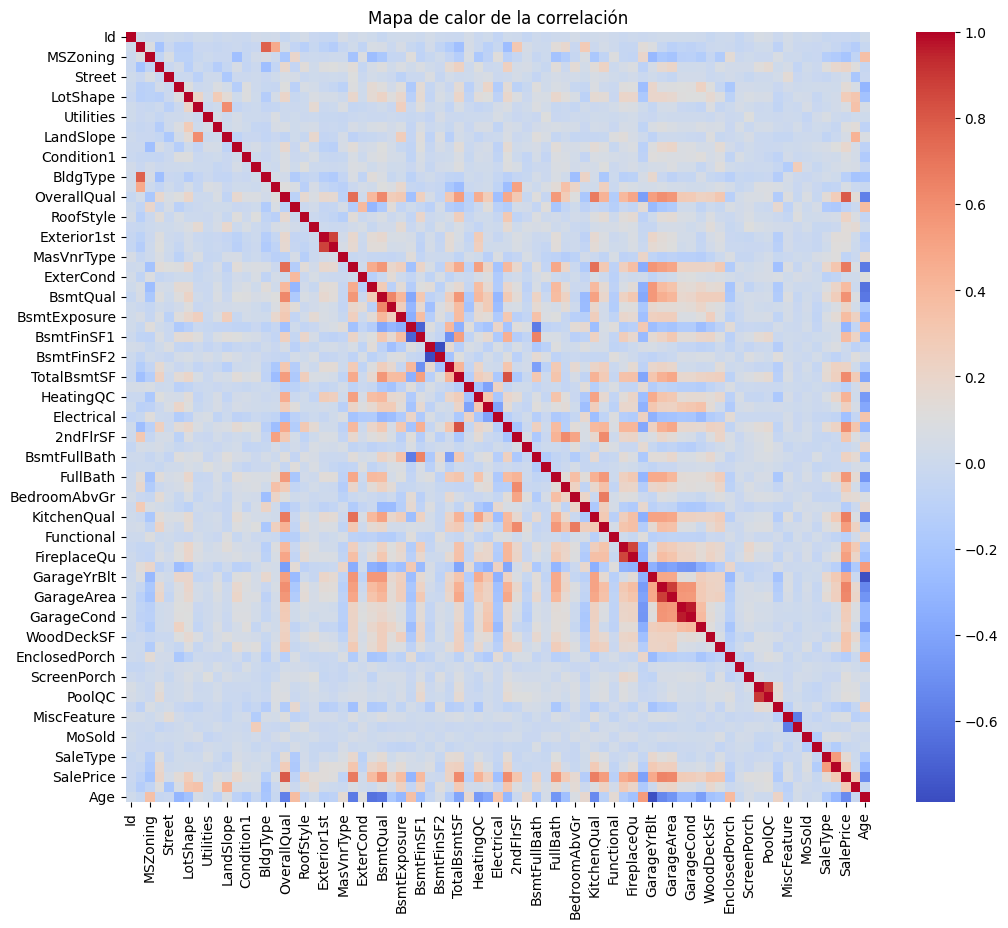

In [ ]:
correlation_matrix = raw_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(data=correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Mapa de calor de la correlación")
plt.show()


In [ ]:
print(correlation_matrix)

                 Id  MSSubClass  MSZoning  LotFrontage  Street  Alley  \
Id             1.00        0.01     -0.01        -0.02    0.01  -0.00   
MSSubClass     0.01        1.00      0.08        -0.22   -0.02  -0.11   
MSZoning      -0.01        0.08      1.00        -0.07    0.07  -0.10   
LotFrontage   -0.02       -0.22     -0.07         1.00   -0.03   0.03   
Street         0.01       -0.02      0.07        -0.03    1.00  -0.02   
...             ...         ...       ...          ...     ...    ...   
SaleType      -0.03       -0.00     -0.13         0.11   -0.04   0.02   
SaleCondition -0.02       -0.04     -0.16         0.18    0.00   0.01   
SalePrice     -0.02       -0.08     -0.21         0.21    0.04   0.14   
TotalArea     -0.03       -0.13     -0.07         0.11   -0.19   0.06   
Age            0.01       -0.03      0.35        -0.04   -0.02  -0.30   

               LotShape  LandContour  Utilities  LotConfig  ...  Fence  \
Id                -0.02         0.01       0.01  

### *Analisis Univariable*

In [ ]:
print(raw_data['SalePrice'].describe())

count     1460.00
mean    180921.20
std      79442.50
min      34900.00
25%     129975.00
50%     163000.00
75%     214000.00
max     755000.00
Name: SalePrice, dtype: float64


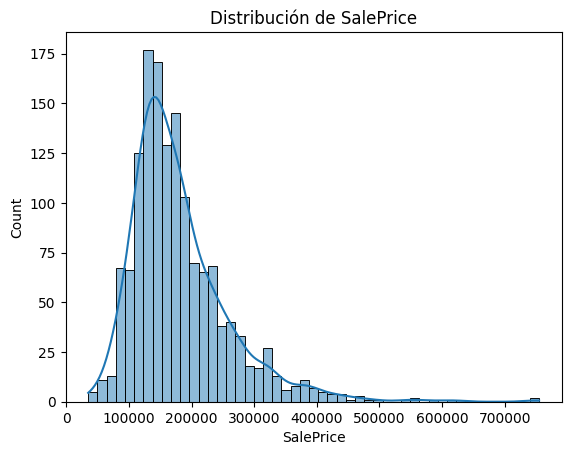

In [ ]:
# Histograma
sns.histplot(raw_data['SalePrice'], kde=True)
plt.title('Distribución de SalePrice')
plt.show()

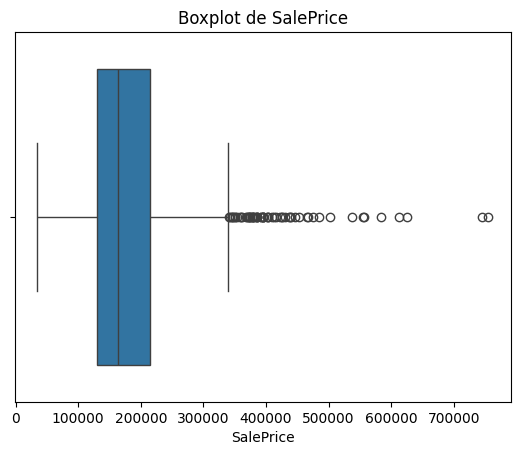

In [ ]:
# Boxplot
sns.boxplot(x=raw_data['SalePrice'])
plt.title('Boxplot de SalePrice')
plt.show()

### *Analisis Bivariable*

In [ ]:
correlation = raw_data.corr()
print(correlation['SalePrice'].sort_values(ascending=False))

SalePrice       1.00
OverallQual     0.79
ExterQual       0.68
KitchenQual     0.66
GarageCars      0.64
                ... 
MSZoning       -0.21
Electrical     -0.23
BsmtFinType1   -0.30
GarageType     -0.42
Age            -0.52
Name: SalePrice, Length: 77, dtype: float64


**Relación entre Overall Quality y Sale Price**

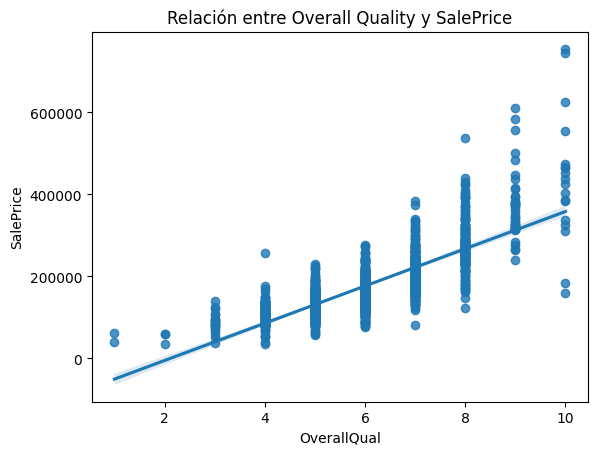

In [ ]:
sns.regplot(x='OverallQual', y='SalePrice', data=raw_data)
plt.title('Relación entre Overall Quality y SalePrice')
plt.show()

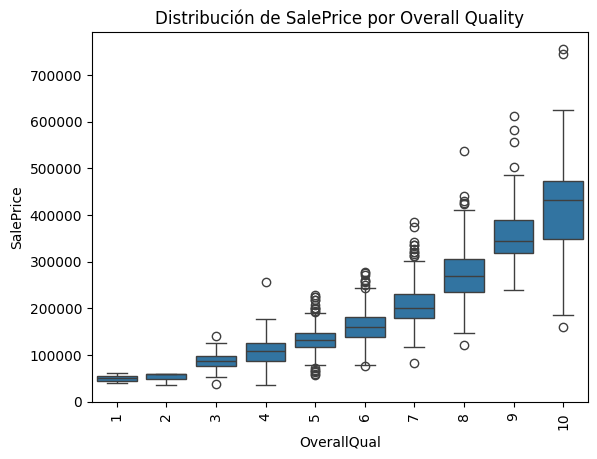

In [ ]:
sns.boxplot(x='OverallQual', y='SalePrice', data=raw_data)
plt.xticks(rotation=90)
plt.title('Distribución de SalePrice por Overall Quality')
plt.show()

**Relación entre GrLivArea y SalePrice**

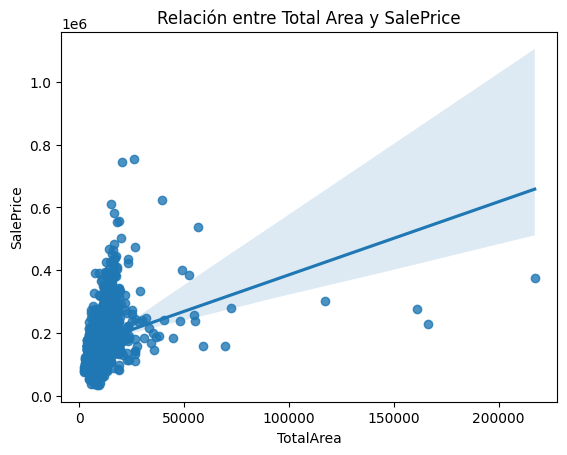

In [ ]:
sns.regplot(x='TotalArea', y='SalePrice', data=raw_data)
plt.title('Relación entre Total Area y SalePrice')
plt.show()

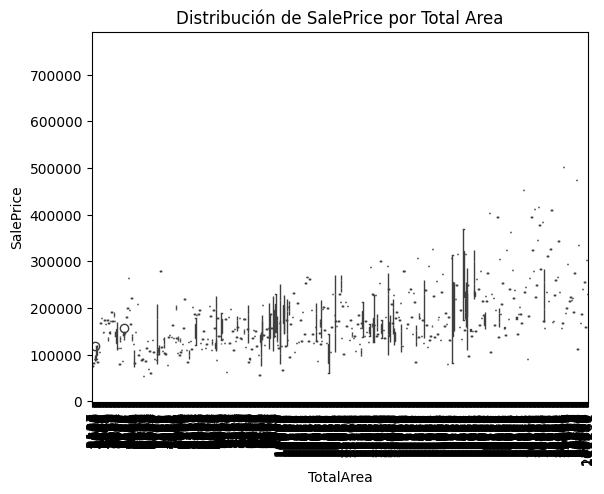

In [ ]:
sns.boxplot(x='TotalArea', y='SalePrice', data=raw_data)
plt.xticks(rotation=90)
plt.title('Distribución de SalePrice por Total Area')
plt.show()

**Relación entre MSSubClass y SalePrice**

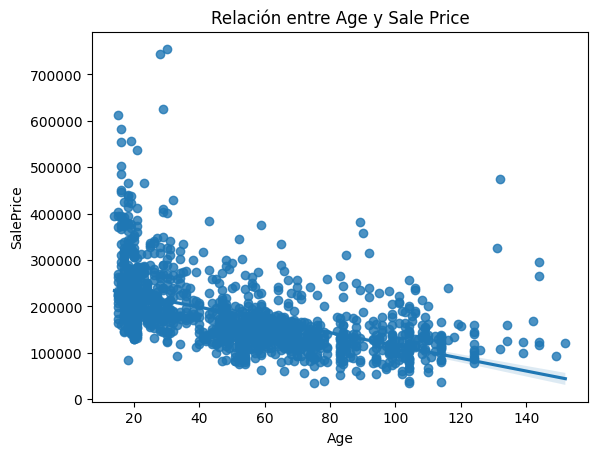

In [ ]:
sns.regplot(x='Age', y='SalePrice', data=raw_data)
plt.title('Relación entre Age y Sale Price')
plt.show()

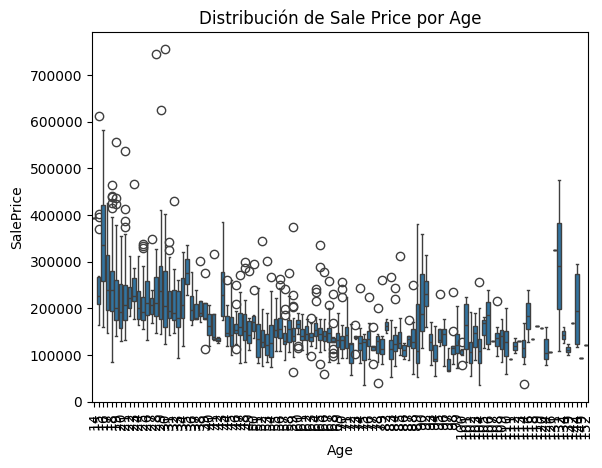

In [ ]:
sns.boxplot(x='Age', y='SalePrice', data=raw_data)
plt.xticks(rotation=90)
plt.title('Distribución de Sale Price por Age')
plt.show()

**Relación entre Neighborhood y SalePrice**

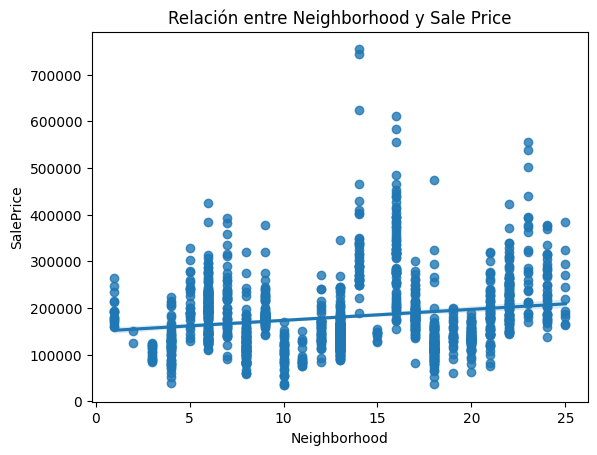

In [ ]:
sns.regplot(x='Neighborhood', y='SalePrice', data=raw_data)
plt.title('Relación entre Neighborhood y Sale Price')
plt.show()

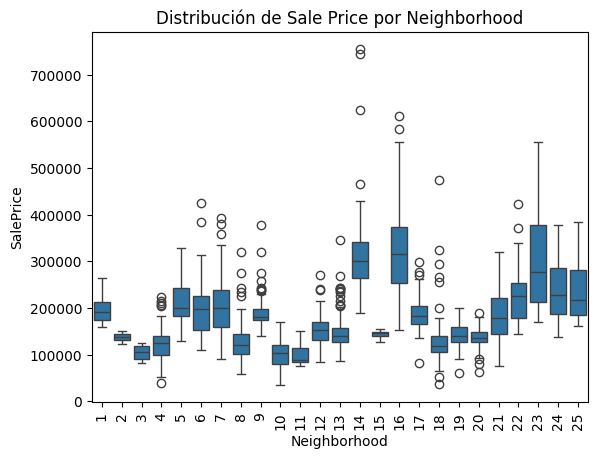

In [ ]:
sns.boxplot(x='Neighborhood', y='SalePrice', data=raw_data)
plt.xticks(rotation=90)
plt.title('Distribución de Sale Price por Neighborhood')
plt.show()

**Relación entre ExterQual y SalePrice**

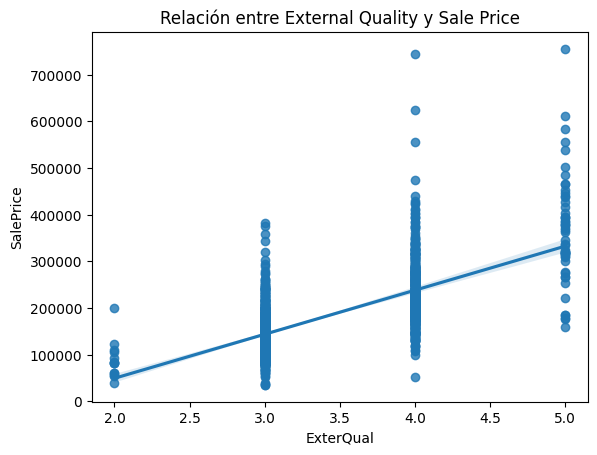

In [ ]:
sns.regplot(x='ExterQual', y='SalePrice', data=raw_data)
plt.title('Relación entre External Quality y Sale Price')
plt.show()

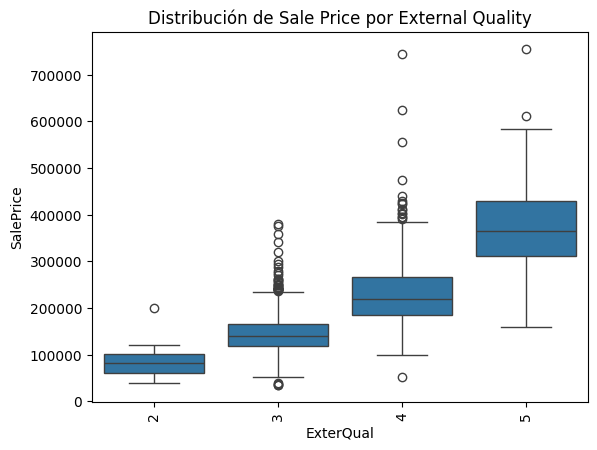

In [ ]:
sns.boxplot(x='ExterQual', y='SalePrice', data=raw_data)
plt.xticks(rotation=90)
plt.title('Distribución de Sale Price por External Quality')
plt.show()

### *Analisis Multivariable*

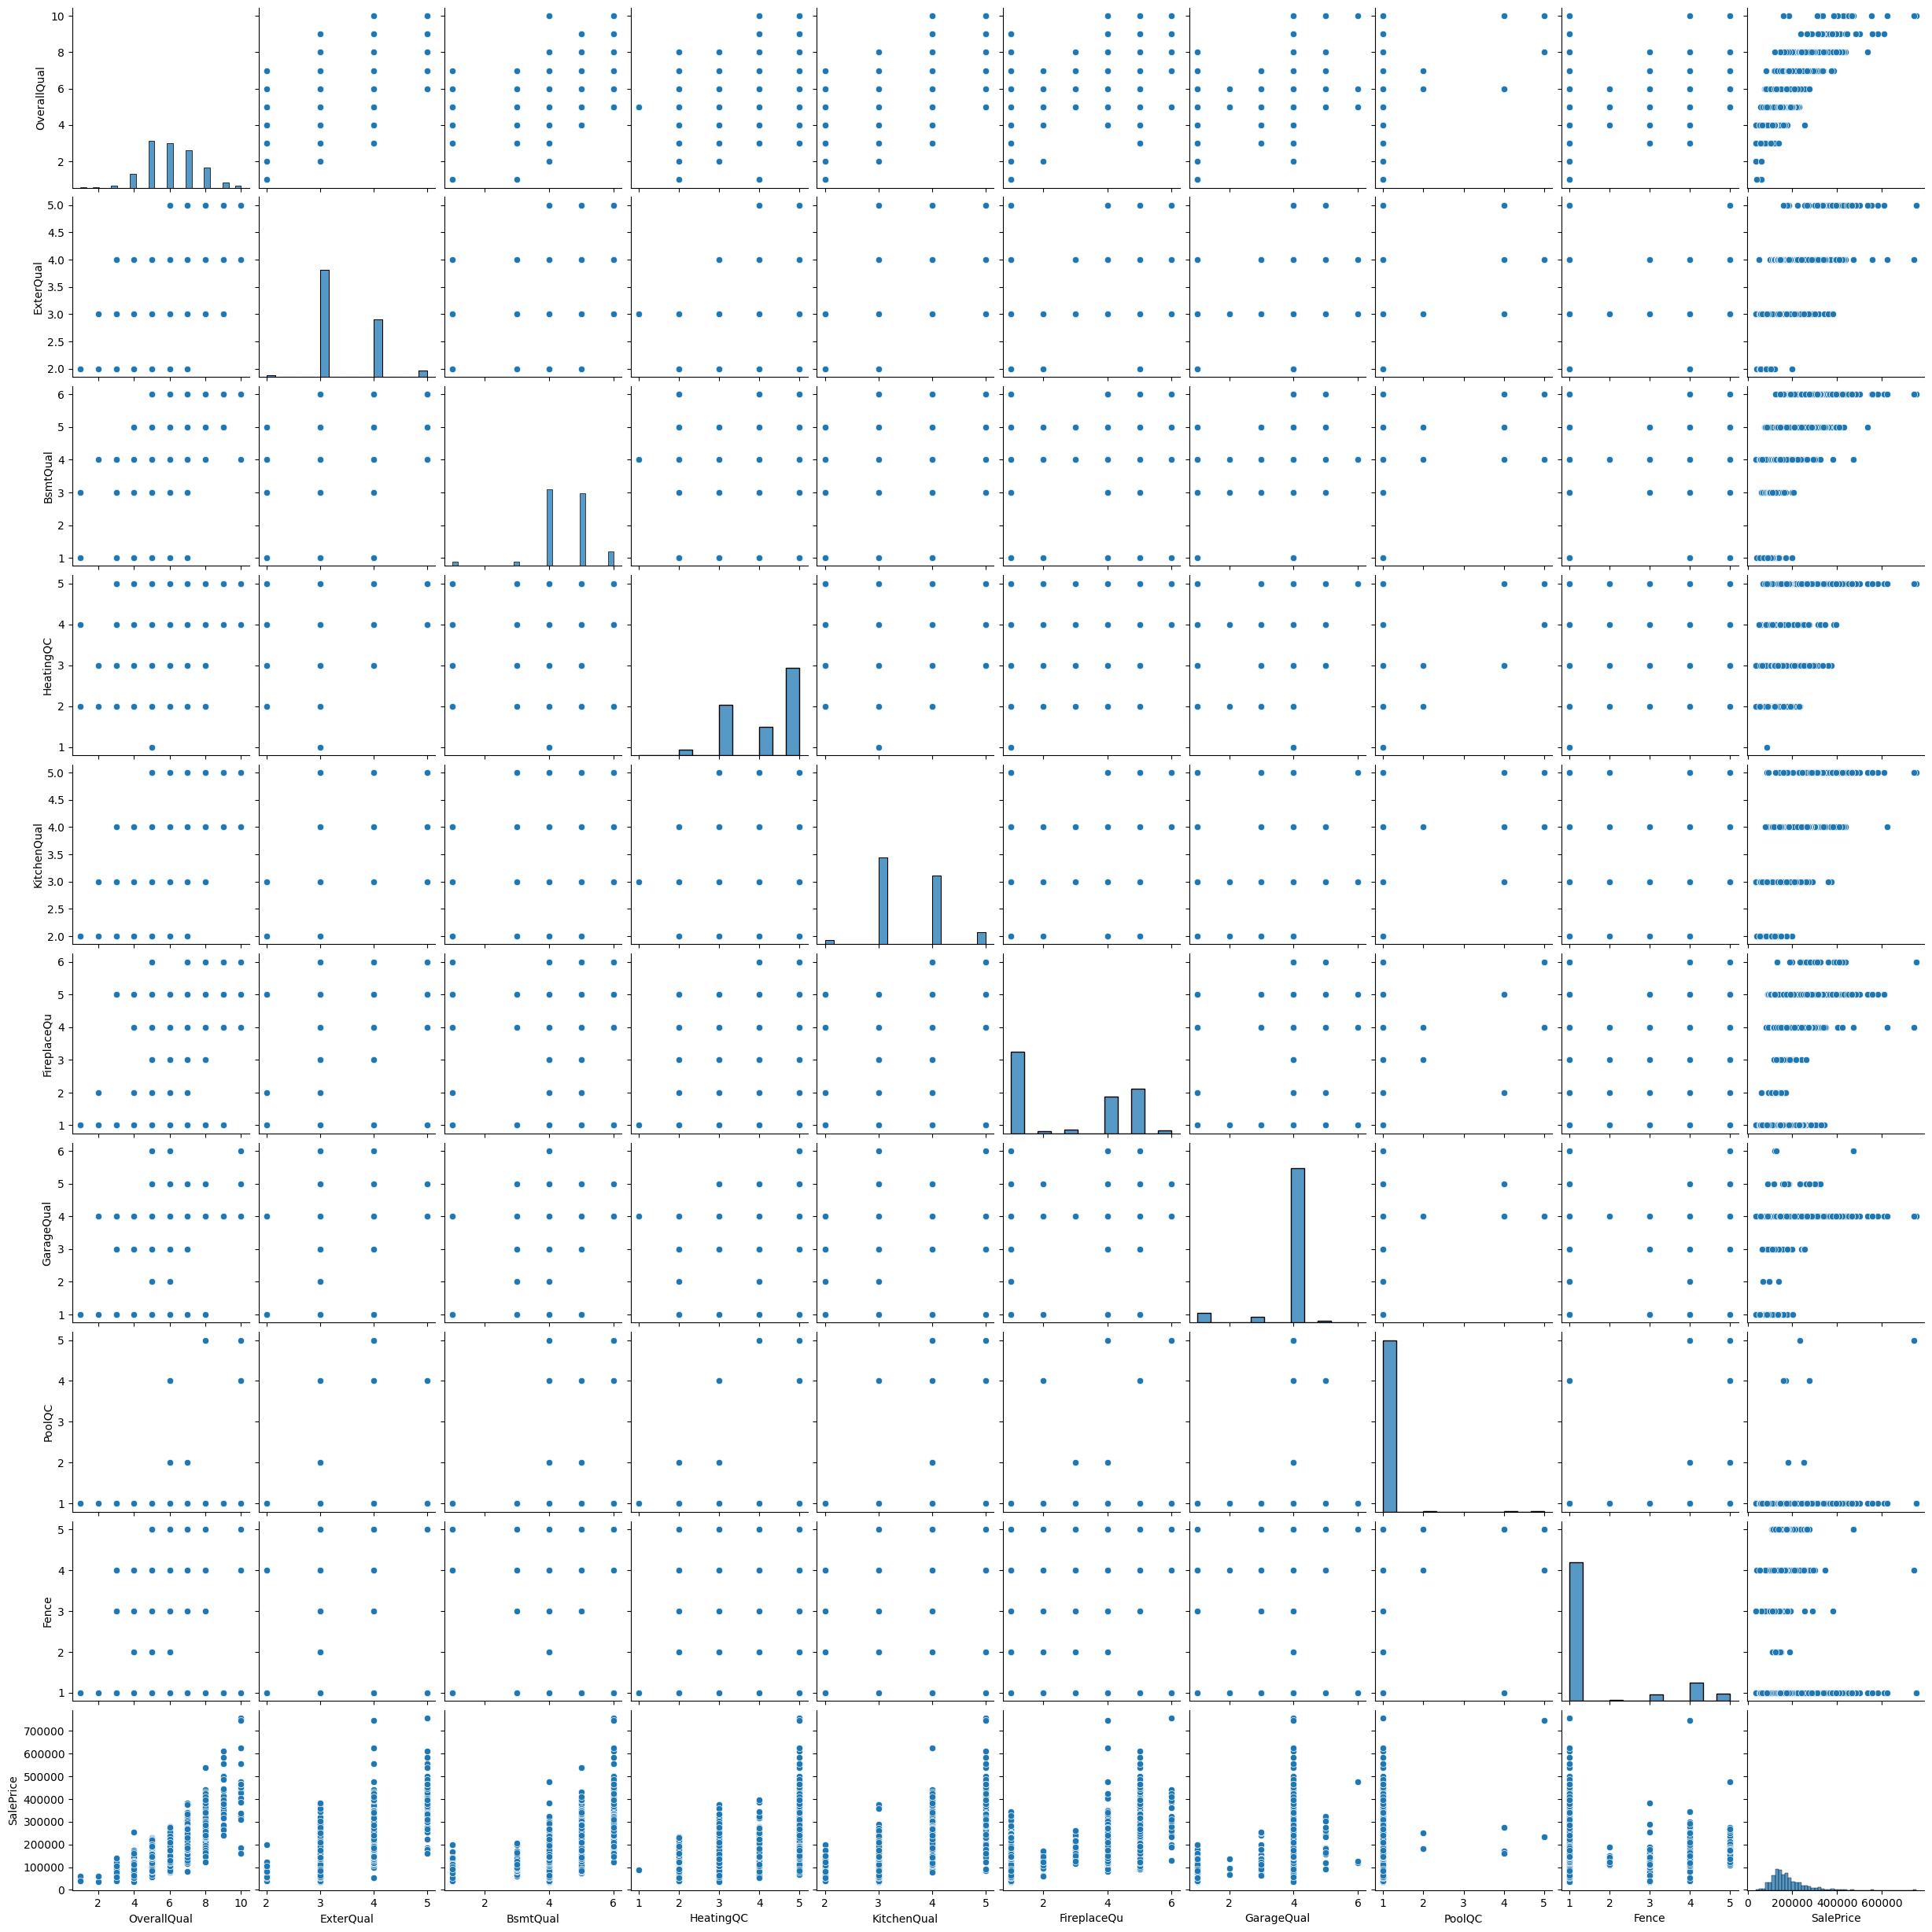

In [ ]:
sns.pairplot(raw_data[['OverallQual', 'ExterQual', 'BsmtQual', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'PoolQC', 'Fence', 'SalePrice']])
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Seleccionar solo variables numéricas
X = raw_data.select_dtypes(include=['float64', 'int64']).drop(columns=['SalePrice'])

# Calcular VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

         Variable      VIF
0              Id     4.25
1      MSSubClass    19.23
2        MSZoning    47.49
3     LotFrontage     5.13
4          Street  1143.29
..            ...      ...
71         YrSold 27071.99
72       SaleType     3.34
73  SaleCondition     3.76
74      TotalArea     4.30
75            Age    32.36

[76 rows x 2 columns]


In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data, threshold_high=10):
    """
    Calcula el VIF para cada variable numérica en un DataFrame y clasifica las variables con VIF alto.

    Parámetros:
    - data: DataFrame de entrada con variables numéricas.
    - threshold_high: valor límite para clasificar VIF como alto.

    Retorna:
    - DataFrame con cada variable, su VIF, y la clasificación "Alto" si excede el threshold.
    - Lista de variables con VIF alto.
    """
    # Seleccionar solo variables numéricas
    X = data.select_dtypes(include=['float64', 'int64'])

    # Crear DataFrame para almacenar resultados de VIF
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

    # Filtrar variables con VIF alto
    high_vif_columns = vif_data[vif_data["VIF"] > threshold_high]["Variable"].tolist()

    return vif_data, high_vif_columns

# Uso de la función en el DataFrame raw_data (excluyendo 'SalePrice')
vif_result, high_vif_list = calculate_vif(raw_data.drop(columns=['SalePrice']))
print("DataFrame con VIF para todas las variables:\n", vif_result)
print("\nLista de variables con VIF alto:\n", high_vif_list)


DataFrame con VIF para todas las variables:
          Variable      VIF
0              Id     4.25
1      MSSubClass    19.23
2        MSZoning    47.49
3     LotFrontage     5.13
4          Street  1143.29
..            ...      ...
71         YrSold 27071.99
72       SaleType     3.34
73  SaleCondition     3.76
74      TotalArea     4.30
75            Age    32.36

[76 rows x 2 columns]

Lista de variables con VIF alto:
 ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'FireplaceQu', 'GarageYrBlt', 'GarageCars',

*Criterio de Zona Geográfica*

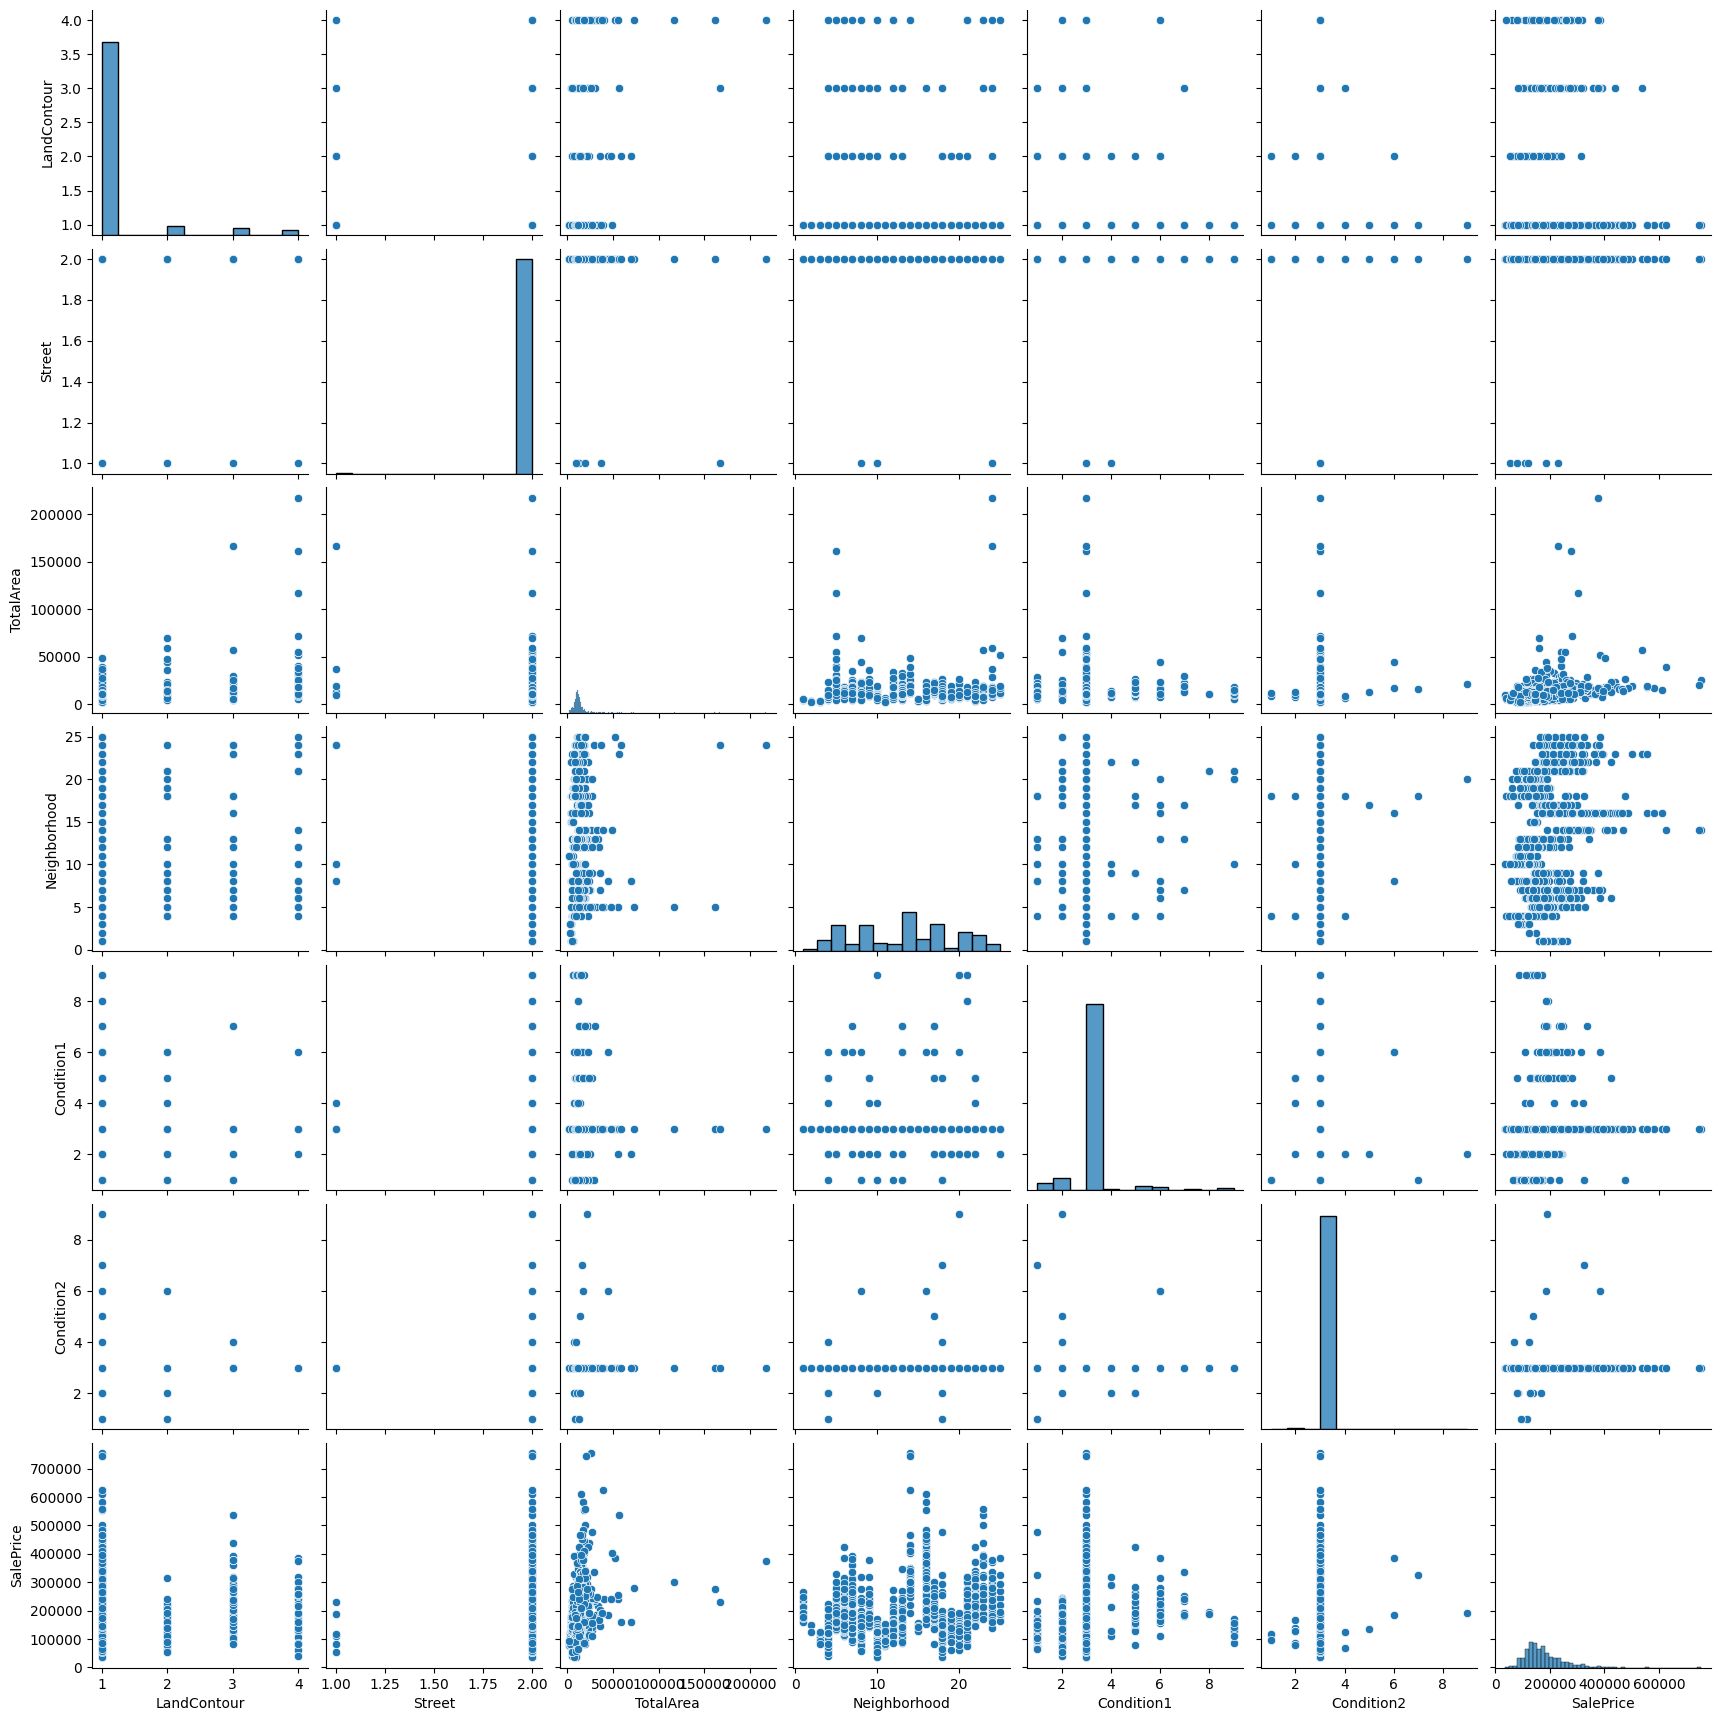

In [ ]:
sns.pairplot(raw_data[['LandContour', 'Street', 'TotalArea', 'Neighborhood', 'Condition1', 'Condition2', 'SalePrice']])
plt.show()

*Criterio de Materiales*

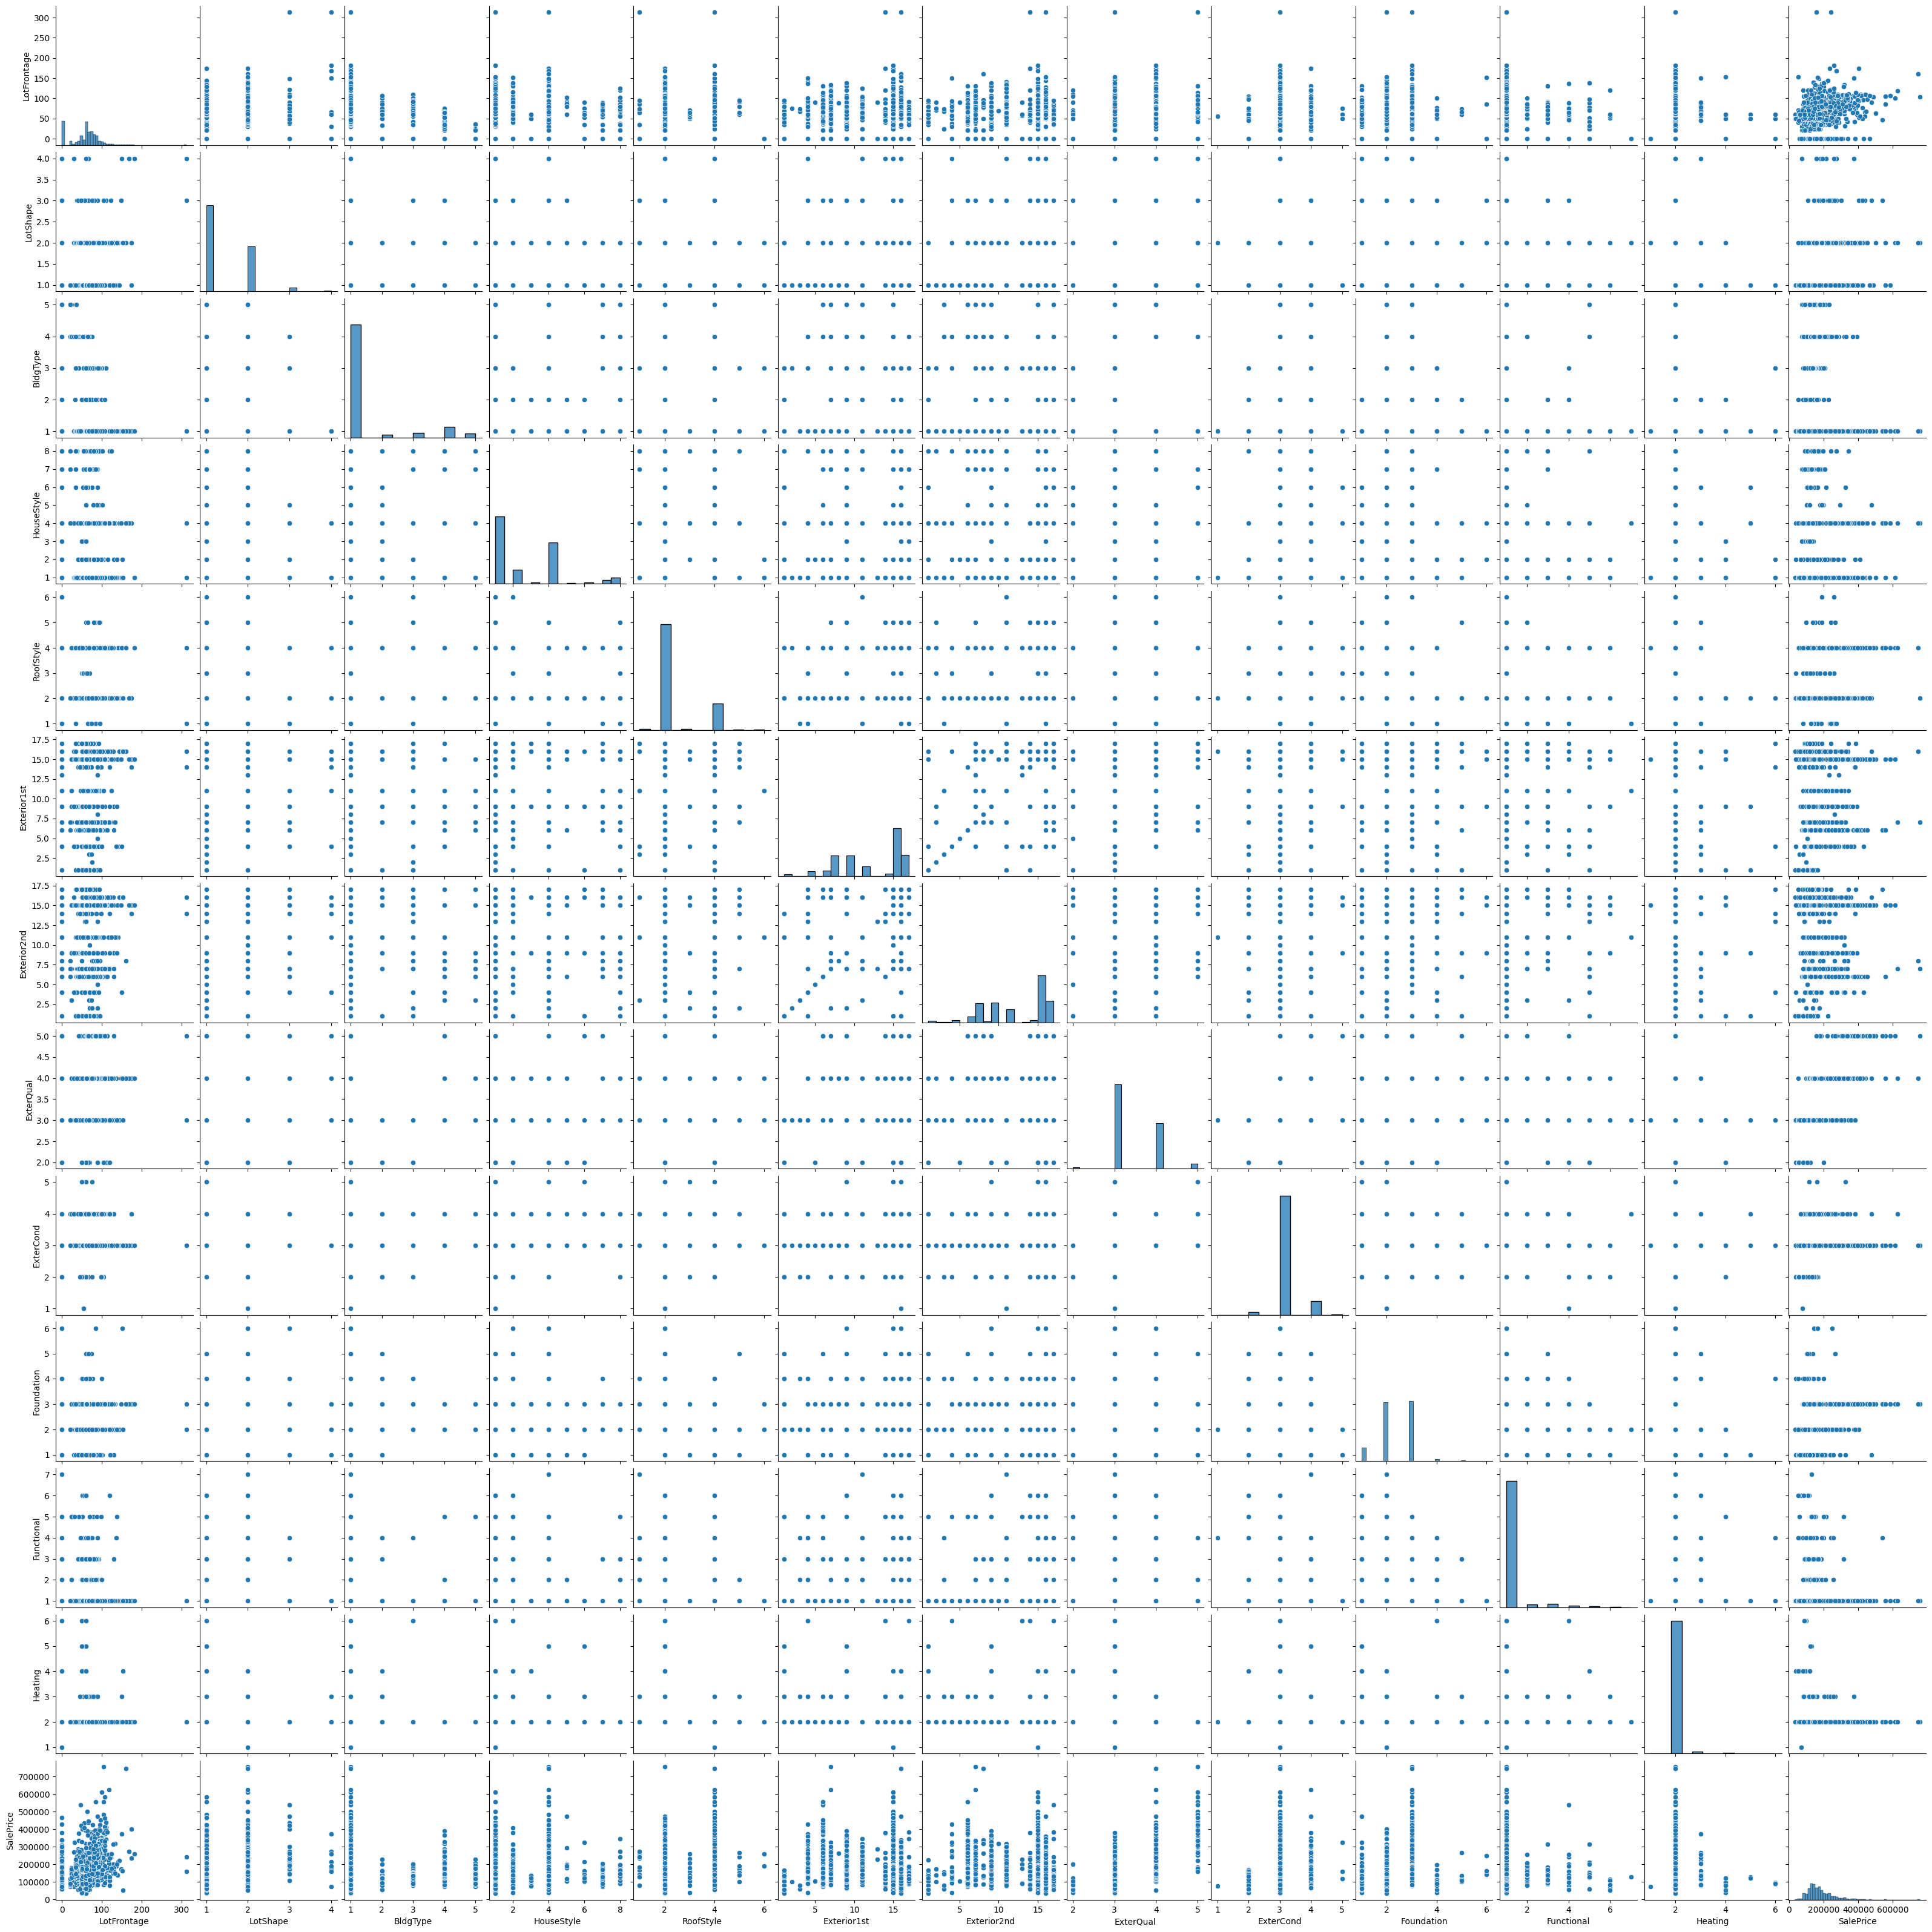

In [ ]:
sns.pairplot(raw_data[['LotFrontage', 'LotShape', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Functional', 'Heating', 'SalePrice']])
plt.show()

*Criterio de Interiores*

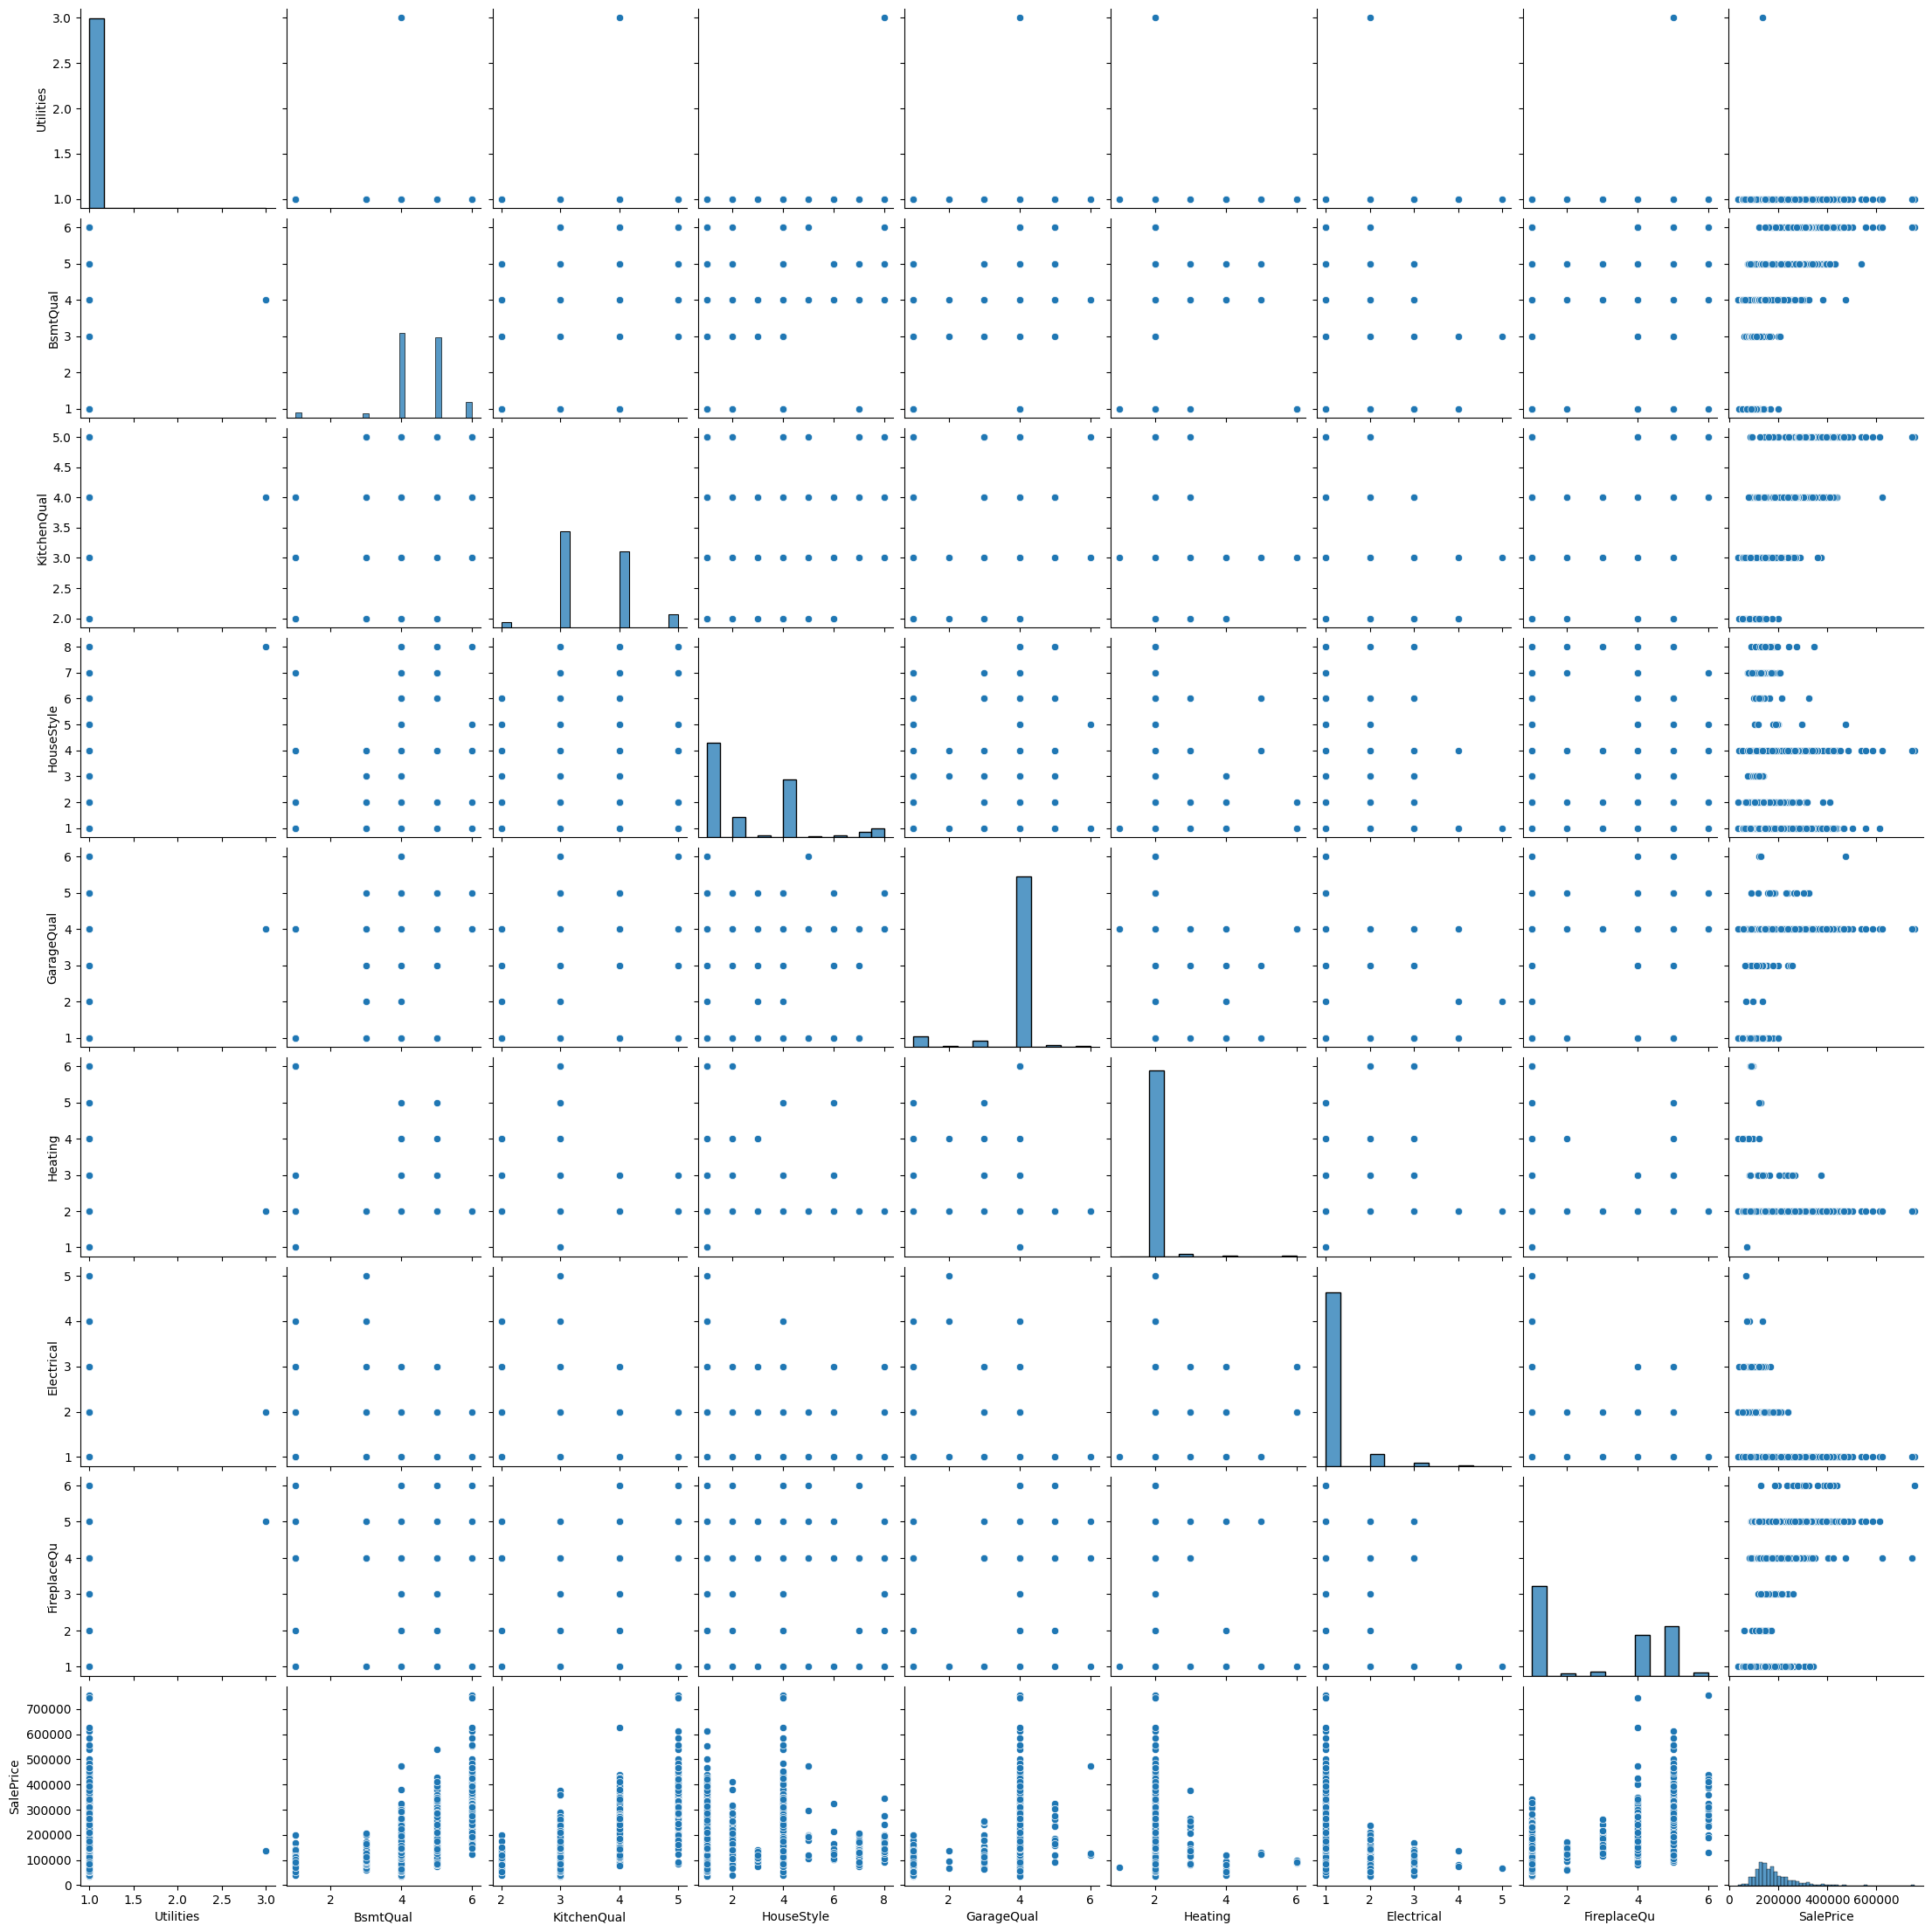

In [ ]:
sns.pairplot(raw_data[['Utilities', 'BsmtQual', 'KitchenQual', 'HouseStyle', 'GarageQual', 'Heating', 'Electrical', 'FireplaceQu', 'SalePrice']])
plt.show()

*Criterio Mixto*

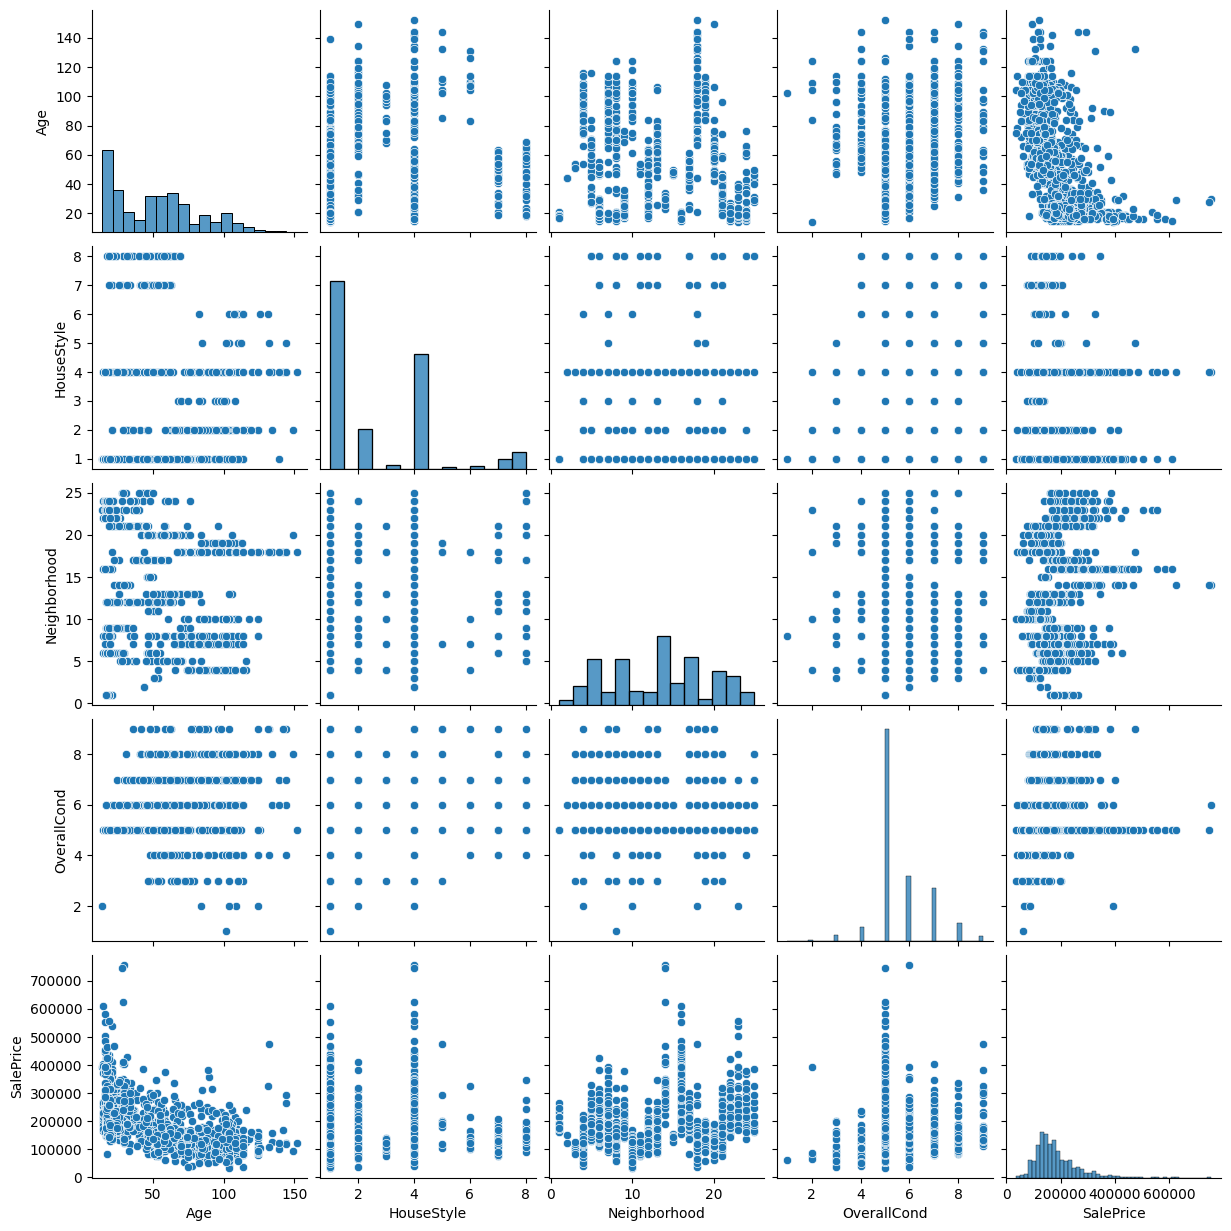

In [ ]:
sns.pairplot(raw_data[['Age', 'HouseStyle', 'Neighborhood', 'OverallCond', 'SalePrice']])
plt.show()

## **Modelado**

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 7))
    return(rmse)

pd.get_dummies


<function pandas.core.reshape.encoding.get_dummies(data, prefix=None, prefix_sep: 'str | Iterable[str] | dict[str, str]' = '_', dummy_na: 'bool' = False, columns=None, sparse: 'bool' = False, drop_first: 'bool' = False, dtype: 'NpDtype | None' = None) -> 'DataFrame'>

### Random Forest

Mean Absolute Error (MAE): 19018.711753424657
Mean Squared Error (MSE): 1136798211.3522155
Root Mean Squared Error (RMSE): 33716.43829576629
R2 Score: 0.8109597709665108


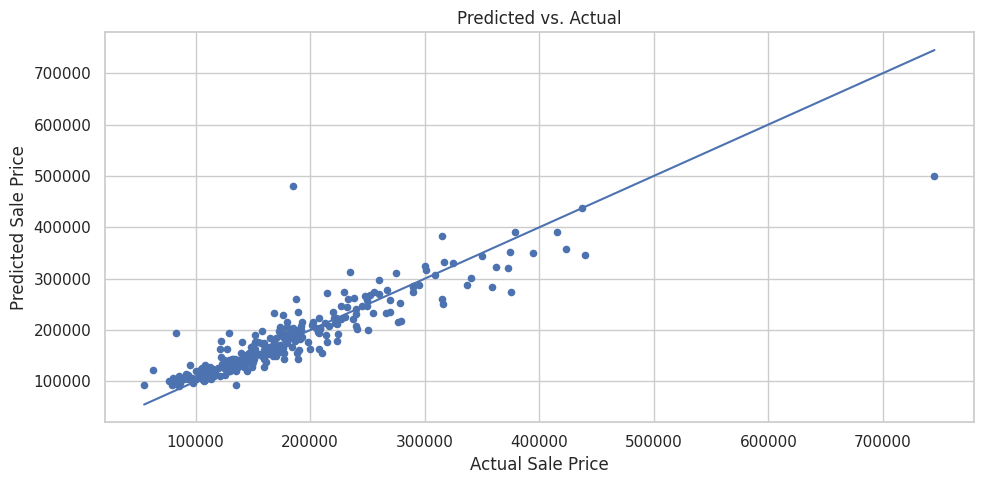

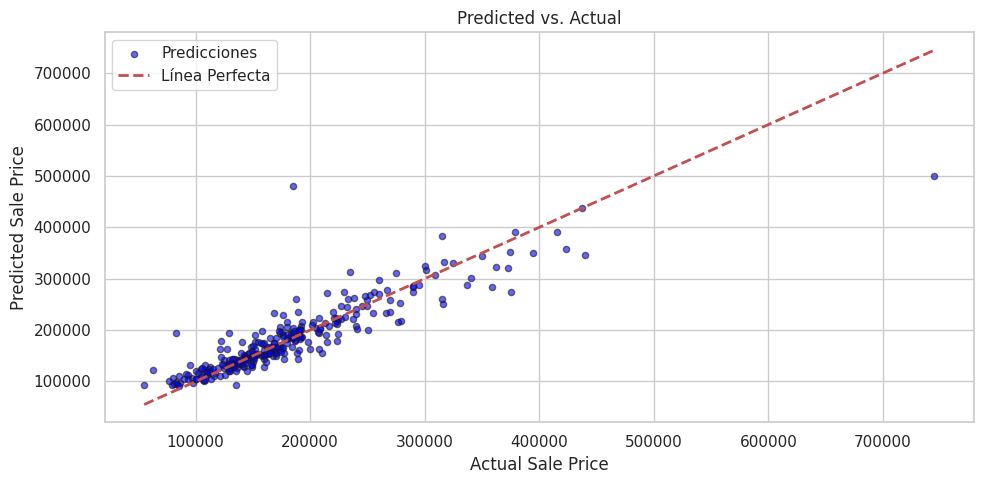

In [ ]:
# Commented out IPython magic to ensure Python compatibility.
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# %matplotlib inline

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train)
model_rf = RandomForestRegressor(n_estimators=500, n_jobs=-1)

model_rf.fit(X_train1, y_train1)
rf_pred = model_rf.predict(X_test1)

plt.figure(figsize=(10, 5))
plt.scatter(y_test1, rf_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)])
plt.tight_layout()

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calcular las métricas de error
mae = mean_absolute_error(y_test1, rf_pred)
mse = mean_squared_error(y_test1, rf_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test1, rf_pred)

# Imprimir resultados
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R2 Score:", r2)

# Plotear la gráfica de Predicho vs Real, como tenías inicialmente
plt.figure(figsize=(10, 5))
plt.scatter(y_test1, rf_pred, s=20, color="blue", alpha=0.6, edgecolor="k", label="Predicciones")
plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)], 'r--', lw=2, label="Línea Perfecta")

# Etiquetas de la gráfica
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.legend()
plt.tight_layout()
plt.show()

### Linear regression with regularisation - RIDGE (LB: 2.64792)

Mejor alpha: 75
Mean Absolute Error (MAE): 21414.727066977222
Mean Squared Error (MSE): 1222648160.709507
Root Mean Squared Error (RMSE): 34966.38615455574
R2 Score: 0.8406002394573674


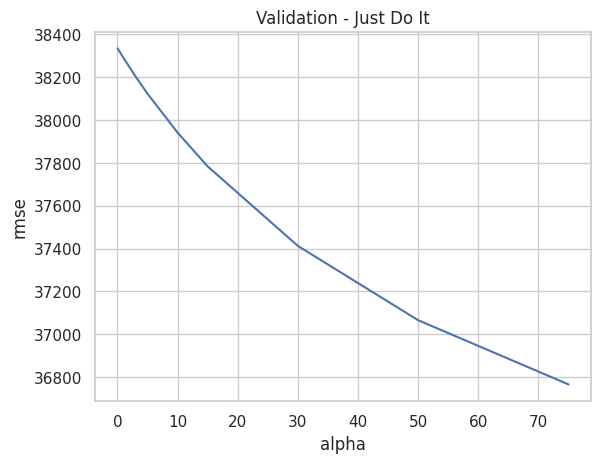

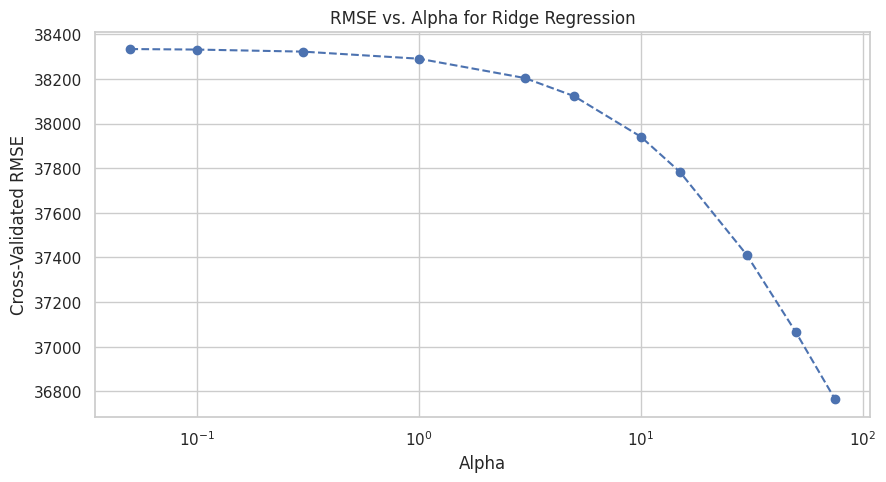

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV

model_rige = Ridge()

alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]

cv_ridge

cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

cv_ridge.min()

# alpha = 10
cv_ridge

# entrenar con alpha = 10
model_ridge = Ridge(alpha = 10).fit(X_train, y_train)
rmse_cv(model_ridge).mean()

# Función para calcular el RMSE con validación cruzada
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=5))
    return rmse

# Lista de valores de alpha
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha=alpha)).mean() for alpha in alphas]

# Seleccionar el mejor alpha
best_alpha = alphas[np.argmin(cv_ridge)]
print("Mejor alpha:", best_alpha)

# Ajustar el modelo Ridge con el mejor alpha
model_ridge = Ridge(alpha=best_alpha)
model_ridge.fit(X_train, y_train)
ridge_pred = model_ridge.predict(X_test)

# Calcular las métricas de error
mae = mean_absolute_error(y_test, ridge_pred)
mse = mean_squared_error(y_test, ridge_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, ridge_pred)

# Imprimir resultados
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R2 Score:", r2)

# Graficar el RMSE de validación cruzada para cada valor de alpha
plt.figure(figsize=(10, 5))
plt.plot(alphas, cv_ridge, marker='o', linestyle='--', color='b')
plt.xlabel('Alpha')
plt.ylabel('Cross-Validated RMSE')
plt.title('RMSE vs. Alpha for Ridge Regression')
plt.xscale('log')
plt.show()


### Linear regression with regularisation - LASSO (LB: 2.10687)

In [ ]:
from sklearn.linear_model import LassoCV
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)

rmse_cv(model_lasso).mean()

# Entrenar el modelo Lasso con validación cruzada para seleccionar el mejor alpha
model_lasso = LassoCV(alphas=[1, 0.1, 0.001, 0.0005], cv=5).fit(X_train, y_train)

# Obtener el mejor alpha encontrado por el modelo LassoCV
best_alpha = model_lasso.alpha_
print("Mejor alpha (LassoCV):", best_alpha)

# Predicciones en el conjunto de prueba
lasso_pred = model_lasso.predict(X_test)

# Calcular las métricas de error
mae = mean_absolute_error(y_test, lasso_pred)
mse = mean_squared_error(y_test, lasso_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lasso_pred)

# Imprimir los resultados
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R2 Score:", r2)

# Validación cruzada con RMSE en el conjunto de entrenamiento
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=5))
    return rmse.mean()

# Calcular el RMSE promedio de validación cruzada
cv_rmse = rmse_cv(model_lasso)
print("Cross-Validated RMSE:", cv_rmse)

Mejor alpha (LassoCV): 1.0
Mean Absolute Error (MAE): 21563.278837312922
Mean Squared Error (MSE): 1197682348.4799762
Root Mean Squared Error (RMSE): 34607.547565234614
R2 Score: 0.8438550961029867
Cross-Validated RMSE: 38331.197190165396


### Linear regression with ElasticNet

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir el modelo ElasticNet
alpha = 1.0         # Término de regularización (ajústalo según sea necesario)
l1_ratio = 0.5      # Razón de mezcla entre Ridge (l1_ratio=0) y Lasso (l1_ratio=1)

elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)

# Entrenar el modelo
elastic_net.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = elastic_net.predict(X_test)

# Calcular las métricas de error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Imprimir los resultados
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R2 Score:", r2)

Mean Absolute Error (MAE): 21411.350438762252
Mean Squared Error (MSE): 1398355057.227965
Root Mean Squared Error (RMSE): 37394.58593470404
R2 Score: 0.8176928830070225


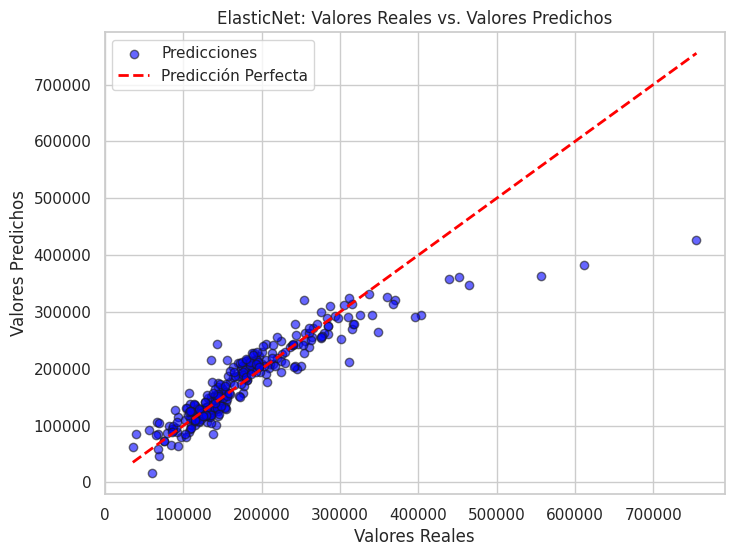

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de gráficos
sns.set(style="whitegrid")

# Crear la gráfica de dispersión de valores reales vs. predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, edgecolor="k", label="Predicciones")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color="red", lw=2, label="Predicción Perfecta")

# Añadir etiquetas y título
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("ElasticNet: Valores Reales vs. Valores Predichos")
plt.legend()
plt.show()



### Comparacion de los modelos

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Crear un diccionario para almacenar resultados
results = {
    'Model': ['Ridge', 'Lasso', 'ElasticNet', 'RandomForest'],
    'MAE': [],
    'MSE': [],
    'RMSE': [],
    'R2 Score': []
}

# Función para calcular y almacenar métricas
def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Agregar resultados al diccionario
    results['MAE'].append(mae)
    results['MSE'].append(mse)
    results['RMSE'].append(rmse)
    results['R2 Score'].append(r2)

# Supongamos que ya tienes los modelos entrenados y sus predicciones:
# Ridge
ridge_pred = model_ridge.predict(X_test)
evaluate_model(y_test, ridge_pred, 'Ridge')

# Lasso
lasso_pred = model_lasso.predict(X_test)
evaluate_model(y_test, lasso_pred, 'Lasso')

# ElasticNet
elasticnet_pred = elastic_net.predict(X_test)
evaluate_model(y_test, elasticnet_pred, 'ElasticNet')

# RandomForest
rf_pred = model_rf.predict(X_test)
evaluate_model(y_test, rf_pred, 'RandomForest')

# Convertir resultados a DataFrame para una comparación clara
results_df = pd.DataFrame(results)
print(results_df)

          Model      MAE           MSE     RMSE  R2 Score
0         Ridge 21414.73 1222648160.71 34966.39      0.84
1         Lasso 21563.28 1197682348.48 34607.55      0.84
2    ElasticNet 21411.35 1398355057.23 37394.59      0.82
3  RandomForest 18672.37  919006056.33 30315.11      0.88


## **Conclusiones y Observaciones**

* Para máxima precisión: Si el objetivo es obtener predicciones precisas sin preocuparse demasiado por la interpretabilidad, Random Forest es el mejor modelo, dado su alto R² Score y los menores errores.
* Para balancear precisión e interpretabilidad: Si es importante mantener cierto nivel de interpretabilidad y un buen rendimiento, ElasticNet es una opción óptima.
* Para simplicidad y fácil interpretabilidad: Si el enfoque está en la interpretación del modelo y en una regresión menos compleja, tanto Lasso como Ridge son adecuados, siendo Lasso útil para la selección de características.